In [21]:
"""
        EE2703 Applied Programming Lab - 2022
        Assignment 6: The Laplace Transform
        Done by: Ishaan Agarwal
        Roll Number: EE20B046
        Date: 15th March, 2022
"""

'\n        EE2703 Applied Programming Lab - 2022\n        Assignment 6: The Laplace Transform\n        Done by: Ishaan Agarwal\n        Roll Number: EE20B046\n        Date: 15th March, 2022\n'

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sp

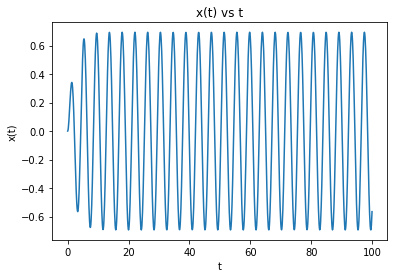

In [23]:
#Question 1
#solving an equation using laplace transform

'''given system equation x''+2.25x = f(t)
where f(t) = cos(1.5t)e^(-0.5t)u(t)
and the Laplace transform of f(t) is
F(s) = (s+0.5)/((s+0.5)^2+2.25)

Thus, the given equation in Laplace domain is s^2 X(s) + 2.25 X(s) = F(s)
which implies X(s) = F(s)/(s^2+2.25)
which implies X(s) = (s+0.5) / ( [ (s+0.5)^2 + 2.25 ] [ s^2 + 2.25 ] )
and x(t) = L^-1 (X(s))
'''
#X = (s+0.5) / ( [ s^2 + s + 2.5 ] [ s^2 + 2.25 ] )
X = sp.lti( np.poly1d([1,0.5]) , np.polymul( np.poly1d([1,1,2.5]) , np.poly1d([1,0,2.25]) ) )

#using sp.impulse to calculate the inverse laplace
t,x=sp.impulse(X, None, np.linspace(0,100,1001))

plt.plot(t,x)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('x(t) vs t')
plt.show()

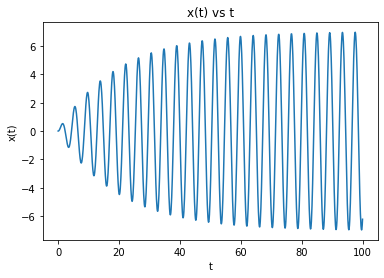

In [24]:
#Question 2
#Solving for a much smaller decay of 0.05

'''given system equation x''+2.25x = f(t)
where f(t) = cos(1.5t)e^(-0.05t)u(t)
and the Laplace transform of f(t) is
F(s) = (s+0.5)/((s+0.05)^2+2.25)

Thus, the given equation in Laplace domain is s^2 X(s) + 2.25 X(s) = F(s)
which implies X(s) = F(s)/(s^2+2.25)
which implies X(s) = (s+0.5) / ( [ (s+0.05)^2 + 2.25 ] [ s^2 + 2.25 ] )
and x(t) = L^-1 (X(s))
'''
#X = (s+0.5) / ( [ s^2 + 0.1s + 2.2525 ] [ s^2 + 2.25 ] )
X = sp.lti( np.poly1d([1,0.5]) , np.polymul( np.poly1d([1,0.1,2.2525]) , np.poly1d([1,0,2.25]) ) )

#using sp.impulse to calculate the inverse laplace
t,x=sp.impulse(X, None, np.linspace(0,100,1001))

plt.plot(t,x)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('x(t) vs t')
plt.show()

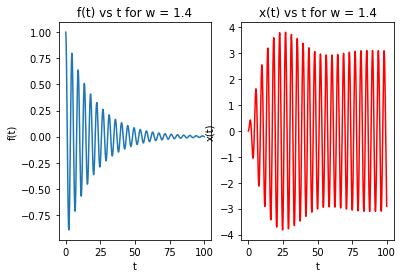

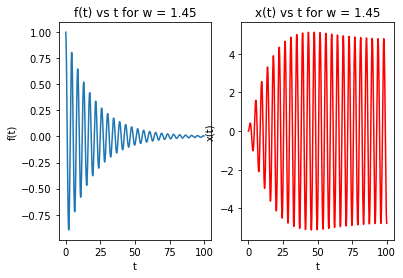

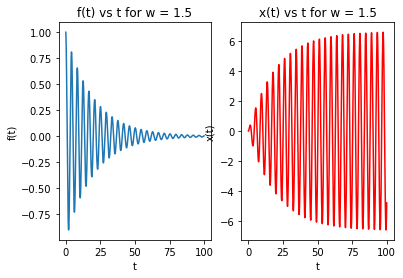

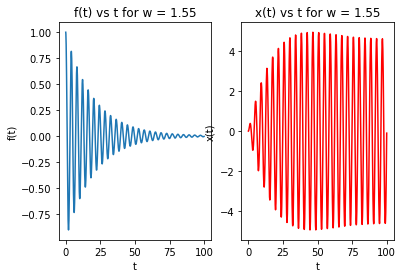

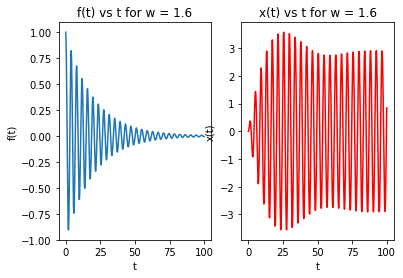

In [25]:
#Question 3
#Finding the LTI response over a range of frequencies in 1.4 to 1.6 with step of 0.05
for w in np.arange(1.4, 1.6, 0.05):
    H = sp.lti([1], [1, 0, 2.25]) #H(s) = 1/(s^2+2.25)
    t = np.linspace(0, 100, 1000) 
    f = np.cos(w * t) * np.exp(-0.05 * t) #f(t) = cos(wt)e^(-0.05t)u(t)

    #making subplots of the corresponging input and output

    plt.subplot(1, 2, 1)
    plt.plot(t, f)
    plt.xlabel('t')
    plt.ylabel('f(t)')
    plt.title('f(t) vs t for w = ' + str(w))

    t, x, svec = sp.lsim(H, f, t) # using lsim to calculate the output of the system
    plt.subplot(1, 2, 2)
    plt.plot(t, x, 'r')
    plt.xlabel('t')
    plt.ylabel('x(t)')
    plt.title('x(t) vs t for w = ' + str(w))
    plt.show()


In [26]:
#We Notice that the maximum amplitude is achieved in the case of w = 1.5, this is because in this case resonance occurs.

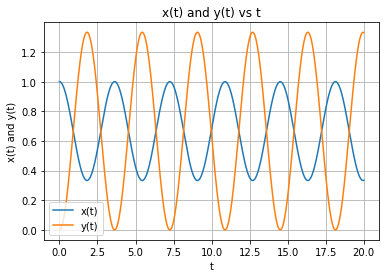

In [27]:
#Question 4
#Solving for a coupled spring problem
"""
Given Equations:
x'' + x - y =0
y'' + 2y - 2x = 0
subject to initial conditions
x(0) = 1
y(0) = 0
x'(0) = 0
y'(0) = 0
On substituting y from first equation into the second equation, we get
x"" + 3x'' = 0
Taking Laplace Transform keeping initial conditions in mind, this becomes, 
X(s) = (s^2+2) / (s^3 + 3s)
Y(s) = 2/(s^3 + 3s)

"""

t = np.linspace(0, 20, 1001)
X = sp.lti([1, 0, 2], [1, 0, 3, 0])
Y = sp.lti([2], [1, 0, 3, 0])
#using sp.impulse to calculate the inverse laplace
t,x=sp.impulse(X, None, t)
t,y=sp.impulse(Y, None, t)

#plotting x and y
plt.plot(t,x)
plt.plot(t,y)
plt.xlabel('t')
plt.ylabel('x(t) and y(t)')
plt.title('x(t) and y(t) vs t')
plt.legend(['x(t)','y(t)'])
plt.grid()
plt.show()




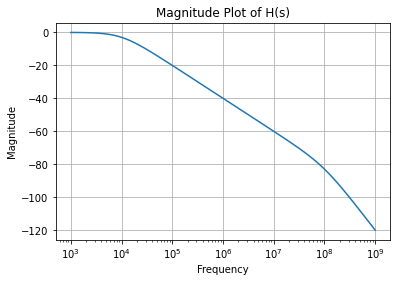

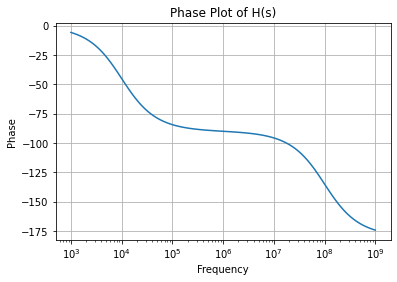

In [28]:
#Question 5
#To obtain the magnitude and phase of the steady state transfer function of the system
'''
Upon manual solving, we get, 
H(s) = 10^12/( s^2 + 10^8 s + 10^12)
'''
H = sp.lti([10**12], [1, 10**8, 10**12])
#plotting Bode magnitude plot
w, mag, phase = sp.bode(H)
plt.semilogx(w, mag)
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('Magnitude Plot of H(s)')
plt.grid()
plt.show()

#plotting Bode phase plot
plt.semilogx(w, phase)
plt.xlabel('Frequency')
plt.ylabel('Phase')
plt.title('Phase Plot of H(s)')
plt.grid()
plt.show()


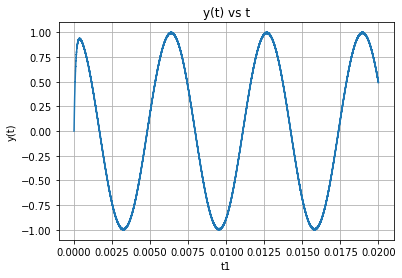

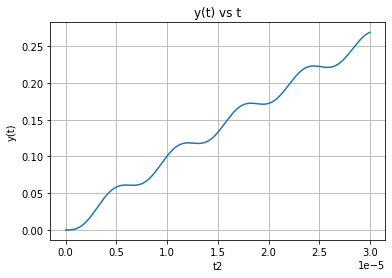

In [29]:
#Question 6
# vi(t) = cos(10^3t)u(t) - cos(10^6t)u(t)
# To define the transfer function as a system and obtain the output
t1 = np.linspace(0, 0.02, 10001)
t2 = np.linspace(0, 30*10**-6, 10001) #initial time interval zoomed in
vi1 = np.cos(10**3 * t1) - np.cos(10**6 * t1)
vi2 = np.cos(10**3 * t2) - np.cos(10**6 * t2)
H = sp.lti([10**12], [1, 10**8, 10**12])
#Finding the output using sp.lsim
t1, y1, svec = sp.lsim(H, vi1, t1)
t2, y2, svec = sp.lsim(H, vi2, t2)


#plotting the output
plt.plot(t1, y1)
plt.xlabel('t1')
plt.ylabel('y(t)')
plt.title('y(t) vs t')
plt.grid()
plt.show()

plt.plot(t2, y2)
plt.xlabel('t2')
plt.ylabel('y(t)')
plt.title('y(t) vs t')
plt.grid()
plt.show()


